<a href="https://colab.research.google.com/github/adithya-183/ML-INTERNSHIP/blob/main/task3d2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEF5L,Thurston,Lacey,WA,98516.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,22.0,124535071.0,POINT (-122.7474291 47.0821119),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1CP1K,King,Sammamish,WA,98074.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,45.0,102359449.0,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJXCDE28G,King,Kent,WA,98031.0,2016,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,33.0,228682037.0,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47.0,0.0,23.0,171566447.0,POINT (-122.64177 47.737525),PUGET SOUND ENERGY INC,5.303509e+10
4,WA1F2AFY4P,Thurston,Olympia,WA,98501.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23.0,0.0,22.0,234923230.0,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [3]:
numeric_data = df.select_dtypes(exclude='object')
categorical_data = df.select_dtypes(include='object')

In [7]:
# Mean of all the columns in dataframe
df.mean()

Postal Code             9.820343e+04
Model Year              2.020272e+03
Electric Range          6.378968e+01
Base MSRP               1.209628e+03
Legislative District    3.052700e+01
DOL Vehicle ID          2.153499e+08
2020 Census Tract       5.302131e+10
dtype: float64

In [8]:
df.mode()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,7SAYGDEE7P,King,Seattle,WA,98052.0,2023.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,4777.0,POINT (-122.12302 47.67668),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10286.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10734.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12050.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23145.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,478909938.0,NaN,NaN,NaN
113108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,478910428.0,NaN,NaN,NaN
113109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,478916028.0,NaN,NaN,NaN
113110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,478925947.0,NaN,NaN,NaN


In [9]:
statistics.median(df['Postal Code'])

98685.0

In [10]:
df.skew()

Postal Code            -58.334395
Model Year              -1.063822
Electric Range           1.315654
Base MSRP               14.234119
Legislative District    -0.577694
DOL Vehicle ID           0.738397
2020 Census Tract      -53.262836
dtype: float64

<Axes: ylabel='Density'>

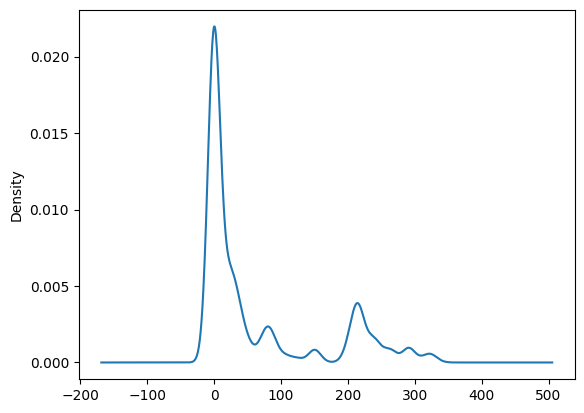

In [12]:
#Example of positive skewness
df['Electric Range'].plot(kind = 'density')

In [13]:
df['Electric Range'].mean()

63.7896774877997

In [14]:
df['Electric Range'].median()

13.0

In [17]:
df['Electric Range'].mode()

0    0.0
Name: Electric Range, dtype: float64

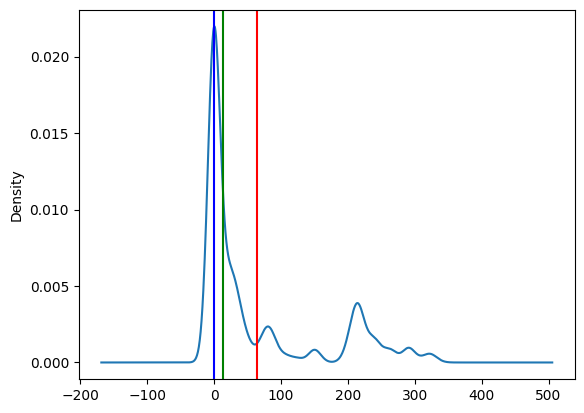

In [18]:
df['Electric Range'].plot(kind='density')
plt.axvline(df['Electric Range'].mean(), color='red')
plt.axvline(df['Electric Range'].median(), color='green')
plt.axvline(df['Electric Range'].mode()[0], color='blue')

<Axes: ylabel='Density'>

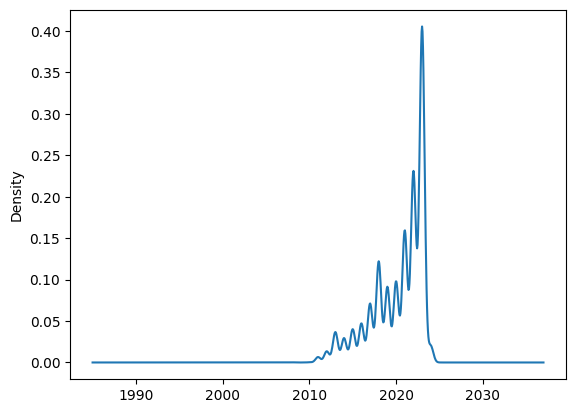

In [19]:
#Example of negative skewness
df['Model Year'].plot(kind = 'density')

In [20]:
df['Model Year'].mean()

2020.2724974140904

In [21]:
df['Model Year'].median()

2021.0

In [22]:
df['Model Year'].mode()

0    2023
Name: Model Year, dtype: int64

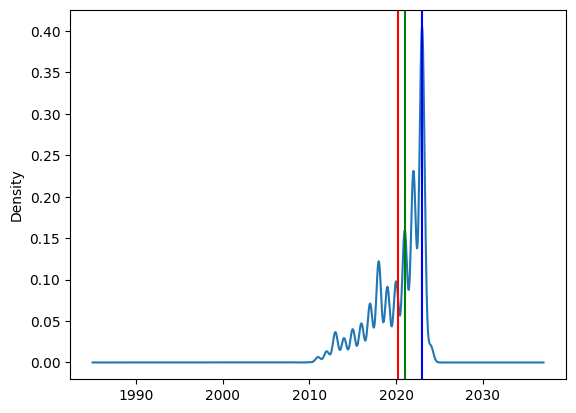

In [23]:
df['Model Year'].plot(kind='density')
plt.axvline(df['Model Year'].mean(), color='red')
plt.axvline(df['Model Year'].median(), color='green')
plt.axvline(df['Model Year'].mode()[0], color='blue')

<Axes: xlabel='Model Year', ylabel='Density'>

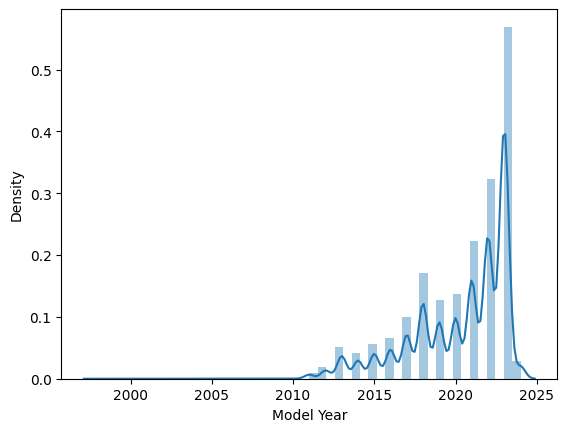

In [24]:
#Normal Distribution/Symmetric
sns.distplot(df['Model Year'],hist=True,kde=True)

<Axes: xlabel='Electric Range', ylabel='Density'>

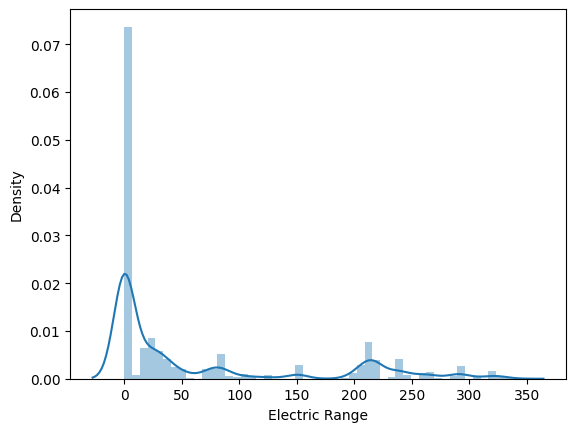

In [25]:
#Normal Distribution/Symmetric
sns.distplot(df['Electric Range'],hist=True,kde=True)

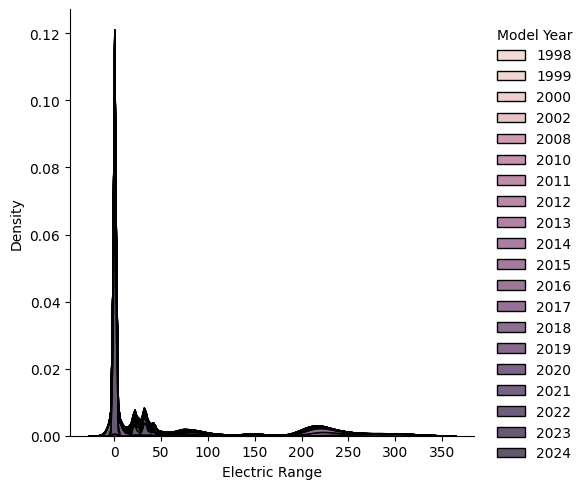

In [28]:
sns.displot(df, x="Electric Range", hue="Model Year", kind="kde", multiple="stack")

<Axes: ylabel='Density'>

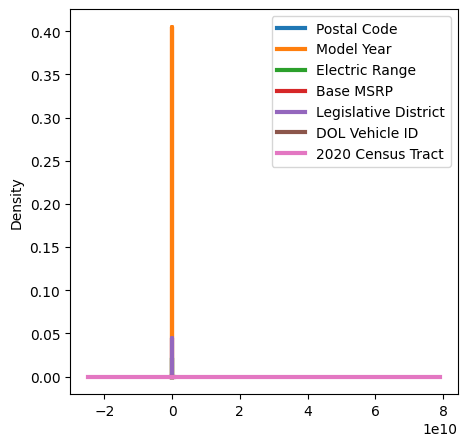

In [29]:
df.plot.density(figsize = (5, 5),linewidth = 3)

In [30]:
df.kurt()

Postal Code             3693.433035
Model Year                 0.426713
Electric Range             0.221423
Base MSRP                752.838824
Legislative District      -0.951068
DOL Vehicle ID             3.341270
2020 Census Tract       2928.098293
dtype: float64

<Axes: xlabel='Electric Range', ylabel='Density'>

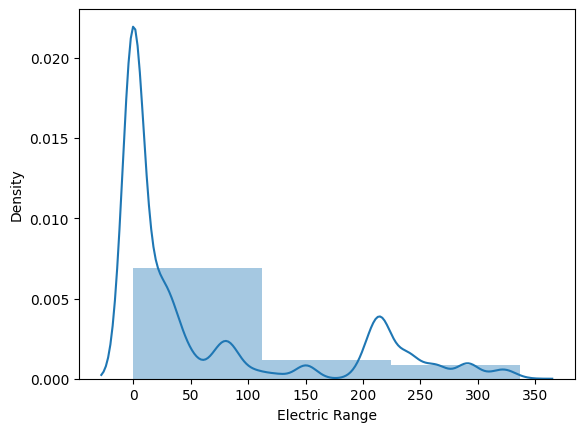

In [31]:
import seaborn as sns
sns.distplot(df['Electric Range'], bins=3)
#for  platkyrutic distribution  use a small number of bins, such as 2 or 3.

<Axes: xlabel='Model Year', ylabel='Density'>

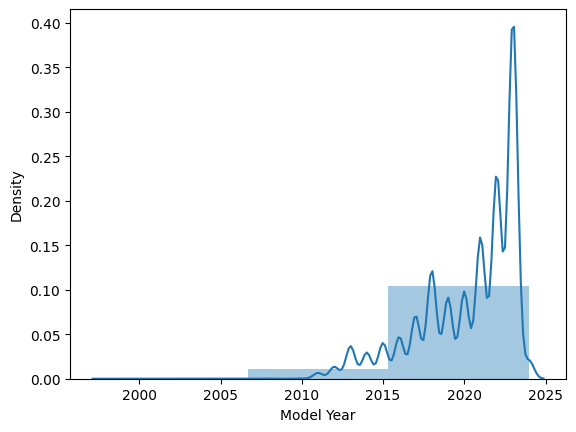

In [32]:
import seaborn as sns
sns.distplot(df['Model Year'], bins=3)
#for  platkyrutic distribution  use a small number of bins, such as 2 or 3.

<Axes: xlabel='Model Year', ylabel='Density'>

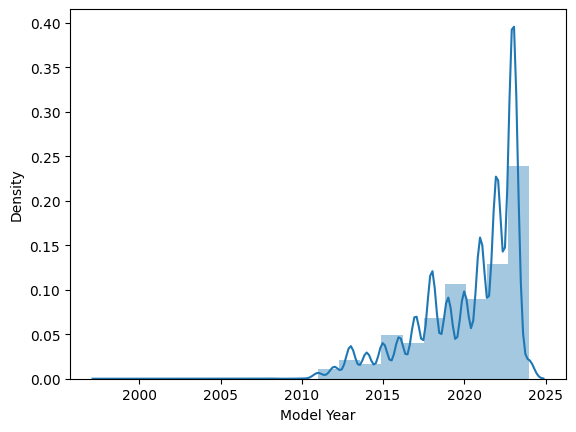

In [33]:
import seaborn as sns
sns.distplot(df['Model Year'], bins=20)
#for  mesokurtic distribution  use a small number of bins, such as 10 or 20

<Axes: xlabel='Model Year', ylabel='Density'>

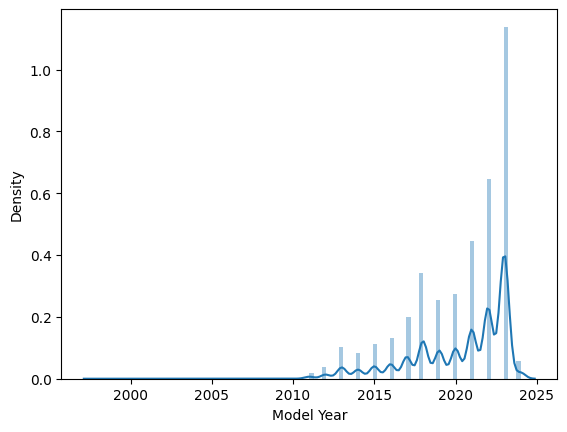

In [34]:
import seaborn as sns
sns.distplot(df['Model Year'], bins=100)
#for  leptokurtic distribution  use a small number of bins, such as 50 or 100

In [35]:
for col in numeric_data.columns:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    print('IQR of %s : %d' %(col,IQR))

IQR of Postal Code : 268
IQR of Model Year : 5
IQR of Electric Range : 84
IQR of Base MSRP : 0
IQR of Legislative District : 25
IQR of DOL Vehicle ID : 73667156
IQR of 2020 Census Tract : 2083200


In [36]:
#We can also find different percentiles of particular column
df['Model Year'].quantile([0.1,0.2,0.4,0.5])

0.1    2016.0
0.2    2018.0
0.4    2020.0
0.5    2021.0
Name: Model Year, dtype: float64

In [37]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113113 entries, 0 to 113112
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Postal Code           113112 non-null  float64
 1   Model Year            113113 non-null  int64  
 2   Electric Range        113112 non-null  float64
 3   Base MSRP             113112 non-null  float64
 4   Legislative District  113054 non-null  float64
 5   DOL Vehicle ID        113112 non-null  float64
 6   2020 Census Tract     113111 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 6.0 MB


In [38]:
for col in numeric_data.columns:
    range = df[col].max() - df[col].min()
    print('range of %s : %d'%(col,range))

range of Postal Code : 93048
range of Model Year : 26
range of Electric Range : 337
range of Base MSRP : 845000
range of Legislative District : 48
range of DOL Vehicle ID : 478929794
range of 2020 Census Tract : 51996898106


In [42]:
percentile25 = df['Electric Range'].quantile(0.25)
percentile75 = df['Electric Range'].quantile(0.75)

In [43]:
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

75th quartile:  84.0
25th quartile:  0.0


In [44]:
iqr = percentile75 - percentile25
print ("IQR: ",iqr)

IQR:  84.0


In [45]:
upper_limit=percentile75+1.5*iqr
print("upper_limit=",upper_limit)

upper_limit= 210.0


In [46]:
lower_limit=percentile25-1.5*iqr
print("lower_limit=",lower_limit)

lower_limit= -126.0


In [47]:
df[df['Electric Range'] > upper_limit]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEF5L,Thurston,Lacey,WA,98516.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,22.0,124535071.0,POINT (-122.7474291 47.0821119),PUGET SOUND ENERGY INC,5.306701e+10
9,5YJ3E1EA1J,Snohomish,Bothell,WA,98021.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,1.0,476172749.0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
13,5YJ3E1EA7J,Thurston,Lacey,WA,98516.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,22.0,254277313.0,POINT (-122.7474291 47.0821119),PUGET SOUND ENERGY INC,5.306701e+10
25,5YJ3E1EB0L,Snohomish,Marysville,WA,98270.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,44.0,6199651.0,POINT (-122.17673 48.05542),PUGET SOUND ENERGY INC,5.306105e+10
34,5YJ3E1EB3L,King,Seattle,WA,98109.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,36.0,126148851.0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113085,5YJSA1E40J,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249.0,0.0,2.0,240760362.0,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
113091,5YJ3E1EA9K,Pierce,Tacoma,WA,98444.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,29.0,476688285.0,POINT (-122.43827 47.153995),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
113098,5YJ3E1EA6L,Thurston,Tumwater,WA,98512.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,22.0,5041914.0,POINT (-122.9131017 47.0135926),PUGET SOUND ENERGY INC,5.306701e+10
113109,5YJ3E1EC1L,Spokane,Spokane,WA,99224.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308.0,0.0,6.0,168754302.0,POINT (-117.460225 47.64927),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10


In [48]:
df[df['Electric Range'] > upper_limit].count()

VIN (1-10)                                           18082
County                                               18082
City                                                 18082
State                                                18082
Postal Code                                          18082
Model Year                                           18082
Make                                                 18082
Model                                                18082
Electric Vehicle Type                                18082
Clean Alternative Fuel Vehicle (CAFV) Eligibility    18082
Electric Range                                       18082
Base MSRP                                            18082
Legislative District                                 18074
DOL Vehicle ID                                       18082
Vehicle Location                                     18082
Electric Utility                                     18082
2020 Census Tract                                    180

In [49]:
new_df = df[df['Electric Range'] < upper_limit]
new_df.shape

(93707, 17)

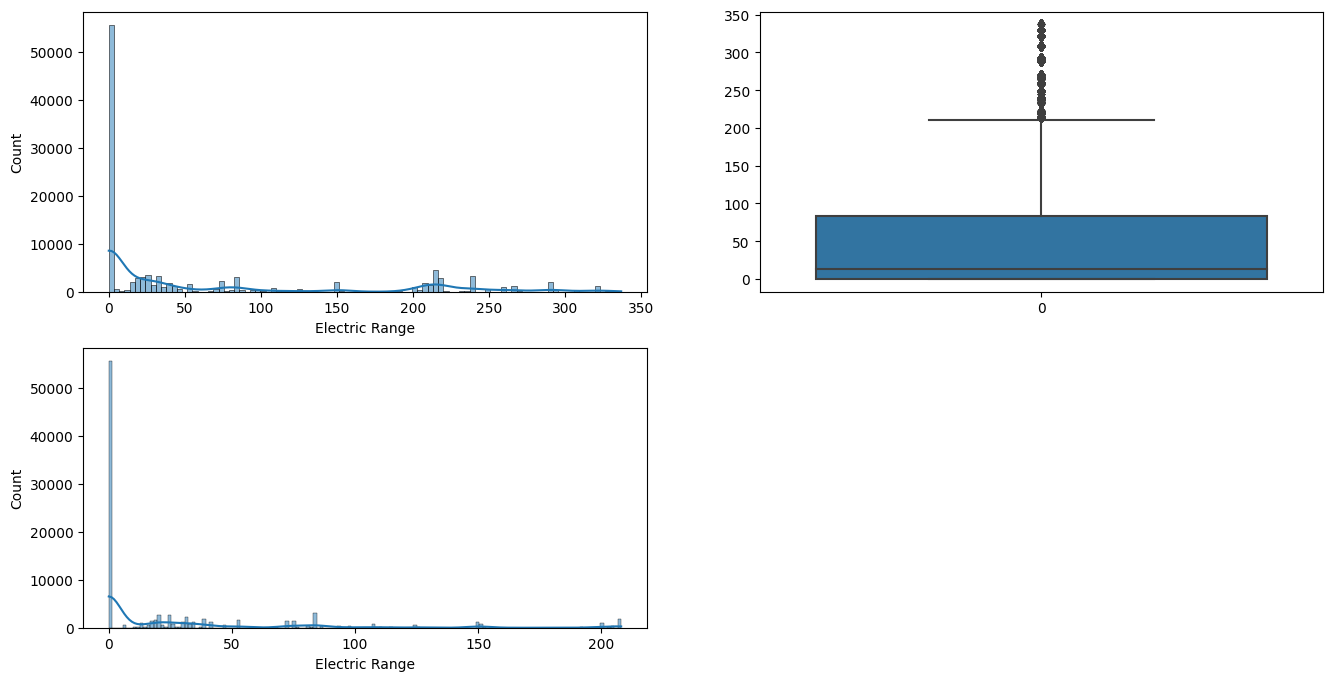

In [54]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['Electric Range'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = df['Electric Range'])

plt.subplot(2,2,3)
sns.histplot(new_df['Electric Range'], kde=True)



plt.show()

In [55]:
new_df_cap = df.copy()

new_df_cap['Electric Range'] = np.where(
    new_df_cap['Electric Range'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Electric Range'] < lower_limit,
        lower_limit,
        new_df_cap['Electric Range']
    )
)

In [56]:
new_df_cap.shape

(113113, 17)

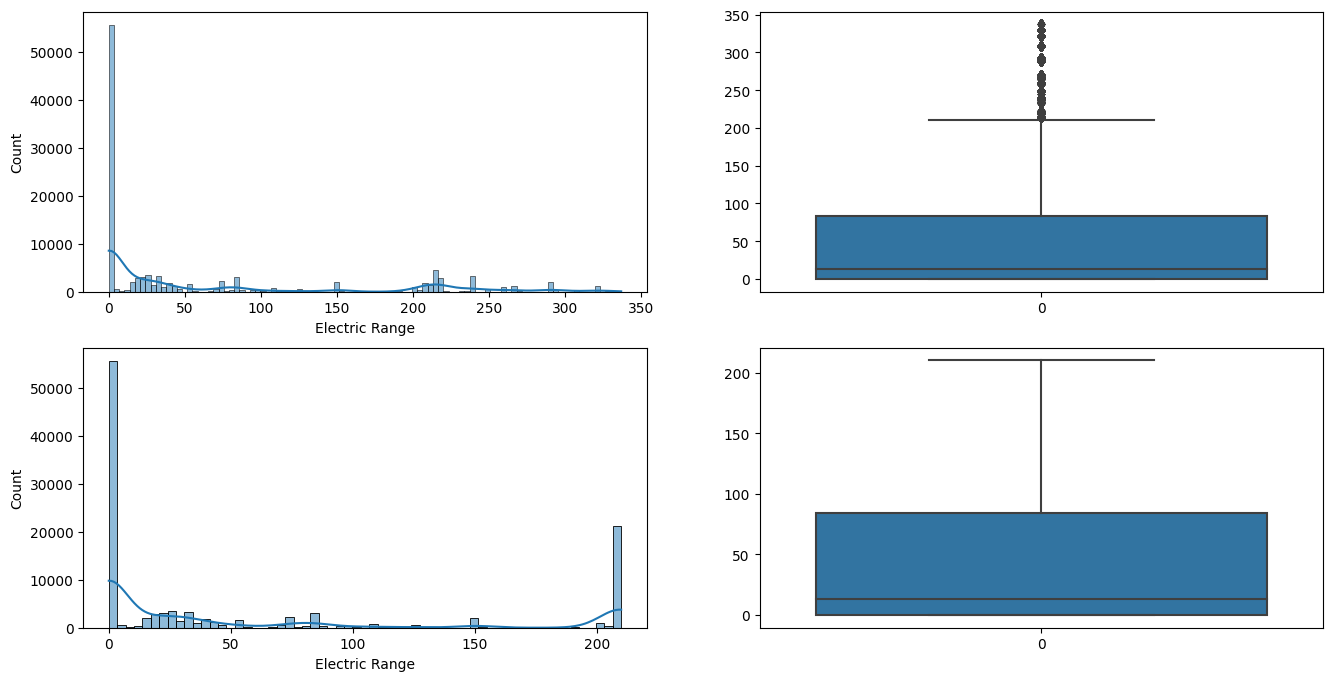

In [57]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['Electric Range'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = df['Electric Range'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['Electric Range'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = new_df_cap['Electric Range'])

plt.show()